In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 
import random
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

In [8]:
class coculture_system:
        def __init__(self):
            return

        def model_dynamics(xk,c1in,c2in,q,Ts):
            def ode_model(t,z,c1in,c2in,q): 
        #c0in~gL-1
        #q~h-1

                dzdt = np.zeros((1,len(z)))
                #Variables
                c0=z[0]
                c1=z[1]
                c2=z[2]
                n1=z[3]
                n2=z[4]


                #Parameter list 
                gamma0 = 4.8e11 #cells/g
                gamma1 = 5.2e11 #cells/g
                gamma2 = 3.4e11 #cells/g
                mu_max1 = 1 #h-1
                mu_max2 = 1.2 #h-1
                Ks0= 6.85e-5 #gL-1
                Ks1= 4.9e-4 #gL-1
                Ks2= 1.02e-4 #gL-1

                #Controllable
                c0in=0.5 #gL-1

                # c2in=1.0
                # q=0.5 #h-1


                mu1 = mu_max1*(c1/(Ks1+c1))*(c0/(Ks0+c0))
                mu2 = mu_max2*(c2/(Ks2+c2))*(c0/(Ks0+c0))

                dzdt[0,0] = q*(c0in - c0) - ((1/gamma0)*mu1*n1+(1/gamma0)*mu2*n2)
                dzdt[0,1] = q*(c1in - c1) - (1/gamma1)*mu1*n1
                dzdt[0,2] = q*(c2in - c2) - (1/gamma2)*mu2*n2
                dzdt[0,3] = (mu1-q)*n1
                dzdt[0,4] = (mu2-q)*n2

                return [(np.transpose(dzdt))]  
            tspan=[0,Ts]
            ode_sol = integrate.solve_ivp( lambda t,z: ode_model(t,z,c1in,c2in,q) , tspan, xk, method='LSODA') 
            xkplusone = ode_sol.y[:,-1]
            return xkplusone


        def simulate(mode,nruns,noisec0,noisec1,noisec2,noisen1,noisen2):
            noise_list = [noisec0,noisec1,noisec2,noisen1,noisen2]
            #random.seed(')
            if mode=='test':
                Nk = 40
            else :
                Nk = 30
            Xmeasured = []
            Ymeasured = []
            nsim =nruns
            for k in range(nsim):
                timel=[0]
                if mode=="test":
                    xk_true = [np.random.uniform(0.75,1.0), np.random.uniform(1.0,1.5), 
                               np.random.uniform(0.75,1.0),np.random.uniform(7.5e9,8.5e9), np.random.uniform(7.5e9,8.5e9)]
                else:
                    xk_true = [np.random.uniform(0.35,1.5), np.random.uniform(0.5,2.0), 
                               np.random.uniform(0.35,1.5),np.random.uniform(5e9,10e9), np.random.uniform(5e9,10e9)]


                    
                xlist_model_true = [xk_true]

                # u1=np.random.uniform(0.1,0.8,Nk)
                # u2=np.random.uniform(10,20,Nk)
                u1 = np.random.uniform(1.5,2.0,Nk) #c1in
                u2 = np.random.uniform(1.5,2.0,Nk) #c2in
                u3 = np.random.uniform(0.75,1.5,Nk) #q
                Ts= np.random.uniform(0.15,0.25,Nk)
                #Ts= np.random.uniform(0.1,0.3,Nk)

#u1a,u1b,u1c,u1d = np.random.uniform(0.3,0.7),np.random.uniform(0.3,0.7),np.random.uniform(0.3,0.7),np.random.uniform(0.3,0.7)
#u2a,u2b,u2c,u2d = np.random.uniform(10,20),np.random.uniform(10,20),np.random.uniform(10,20),np.random.uniform(10,20)

                xkold_noisy = xk_true #Perfect knowledge of I.C. 
                for i in range(Nk):
                     #if mode=='null':
                     #   if i%4==0:
                     #       u1[i]= u1a
                     #       u2[i] =u2a
                     #   elif i%3==0 :
                     #       u1[i]=u1b
                     #       u2[i]=u2b
                     #   elif i%5==0 :
                     #       u1[i]=u1c
                     #       u2[i]=u2c 
                     #   else :
                     #       u1[i]=u1d
                     #       u2[i]=u2d


                    # Ts = np.random.uniform(0.3,0.7,1)[0]  #Sampling time
                    timel.append(timel[i]+Ts[i])
                    #print(len(timel))
                    #print(timel)
                    if mode=='null':
                        pass
                        #u1[i] = 0.1 + 0.3*(1+ 0.5*(np.cos(aos*i)+np.sin(aos*i)))
                        #u2[i] = 10  +   5*(1+0.5*(np.cos(aos*i)+np.sin(aos*i)))
                        #u1[i] = 0.1 + 0.2*(1+ (np.cos(aos*i))) + np.random.uniform(0.3,0.7) 
                        #u2[i] = 10  +   3*(1+ (np.cos(bos*i))) + np.random.uniform(13,18) 
                        #u1[i] = 0.1*(np.sin(aos*i)) + np.random.uniform(0.4,0.5) 
                        #u2[i] = 1*(np.sin(bos*i)) + np.random.uniform(14,16) 
                    else:
                        pass
                        #u1[i] = 0.1 + 0.3*(1+0.5*(np.cos(aos*i)+np.sin(aos*i)))
                        #u2[i] = 10  +   5*(1+0.5*(np.cos(aos*i)+np.sin(aos*i)))
                       # u1[i] = 0.1*(np.sin(aos*i)) + np.random.uniform(0.4,0.5) 
                        #u2[i] = 1*(np.sin(bos*i)) + np.random.uniform(14,16) 

                    xkplus_model_true = coculture_system.model_dynamics(xk_true,u1[i],u2[i],u3[i],Ts[i])

                    xkplus_model_noise = 0.0*xkplus_model_true #Initialize 
                    if mode=="test":
                        for w in range(len(xkplus_model_true)):                    
                            xkplus_model_noise[w] = xkplus_model_true[w] + np.random.normal(0.0,
                            0.0*abs(xkplus_model_true[w]))#noise_list[w]) #*xkplus_model_true[w])
                    else:
                        for w in range(len(xkplus_model_true)):                    
                            xkplus_model_noise[w] = xkplus_model_true[w] + np.random.normal(0.0,
                            0.025*abs(xkplus_model_true[w]))#noise_list[w]) #*xkplus_model_true[w])

                    # xlist_model.append(xkplus_model+np.random.normal(0.0,0.1))
                    xlist_model_true.append(xkplus_model_true)

                    Xmeasured.append([xkold_noisy[0],xkold_noisy[1],xkold_noisy[2],
                                      xkold_noisy[3]/1e10,xkold_noisy[4]/1e10,u1[i],u2[i],u3[i],Ts[i]])
                    Ymeasured.append([xkplus_model_noise[0],xkplus_model_noise[1],xkplus_model_noise[2],
                                      xkplus_model_noise[3]/1e10,xkplus_model_noise[4]/1e10])

                    xkold_noisy = xkplus_model_noise 
                    xk_true = xkplus_model_true #to use for next integration

                states=np.array(xlist_model_true)

                print(len(timel))
                print(len(states[:,0]))
                print(len(u1))
                plt.figure(1)
                plt.plot(timel,states[:,0], '-' ,  color="black" )
                plt.legend(['c0'])

                plt.figure(2)
                plt.plot(timel,states[:,1], '-' , color="black" )
                plt.legend(['c1'])

                plt.figure(3)
                plt.plot(timel,states[:,2], '-' ,color="black" )
                plt.legend(['c2'])

                plt.figure(4)
                plt.semilogy(timel,states[:,3], '-' ,  color="green" )
                plt.legend(['n1'])
                
                plt.figure(5)
                plt.semilogy(timel,states[:,4], '-' ,  color="red" )
                plt.legend(['n2'])

                plt.figure(6)
                plt.step(timel[:-1],u1, '-', color="red")
                plt.legend(['flow rate'])

                plt.figure(7)
                plt.step(timel[:-1],u2, '-', color="blue")
                plt.legend(['c1 inlet']) 
                
                plt.figure(8)
                plt.step(timel[:-1],u3,  '-',color="green")
                plt.legend(['c2 inlet'])

# plt.show()
            if mode=='train':
                print('Entered train mode...')
                plt.show()
                print('Generated resutls with Ts=',Ts)
                print('For total time:',np.sum(Ts))
                print('using', nsim, 'iterations')
                Xm=np.array(Xmeasured)
                Ym=np.array(Ymeasured)
                savetxt('Xtrain.csv',Xm, delimiter=',')
                savetxt('Ytrain.csv',Ym, delimiter=',')
            if mode=='test':
                plt.show()
                print('Generated resutls with Ts=',Ts)
                print('For total time:',np.sum(Ts))
                print('using', nsim, 'iterations')
                Xm=np.array(Xmeasured)
                Ym=np.array(Ymeasured)
                savetxt('Xtest.csv',Xm, delimiter=',')
                savetxt('Ytest.csv',Ym, delimiter=',')

            return timel

31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
31
31
30
Entered train mode...


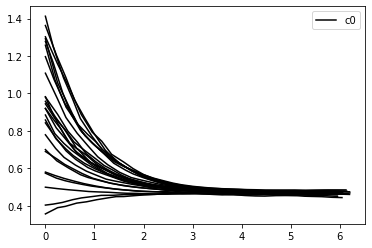

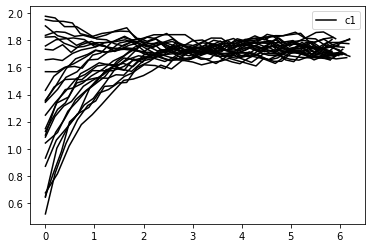

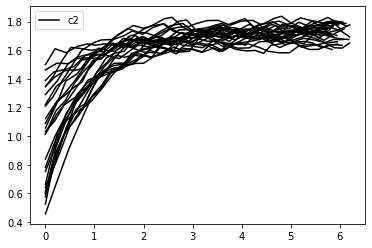

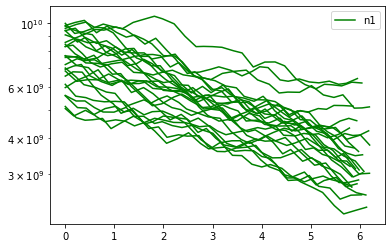

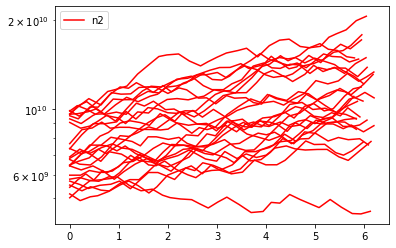

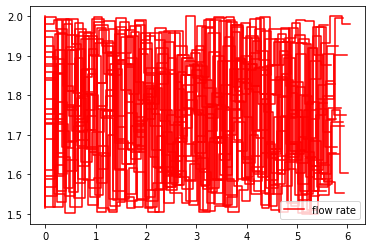

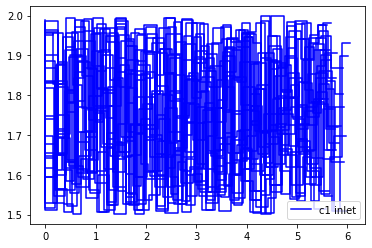

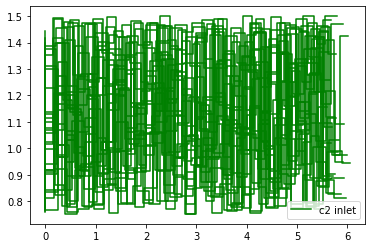

Generated resutls with Ts= [0.23856808 0.1531571  0.2028462  0.15541832 0.21098611 0.16719354
 0.21491791 0.24374733 0.18815756 0.19159565 0.24242719 0.1651261
 0.24135224 0.23064777 0.17774321 0.21324931 0.16800696 0.2249071
 0.21557766 0.18447674 0.17012852 0.24289364 0.19870362 0.17804047
 0.2135779  0.2086305  0.19900096 0.16940176 0.1692188  0.1955273 ]
For total time: 5.97522552922975
using 25 iterations


In [10]:
if __name__ == "__main__":
    mode = 'train'
    lims = 0.75
    if mode=='test':
        nsim=5
        #aos = np.random.uniform(lims,lims,1)
        #bos = np.random.uniform(lims,lims,1)
        noisec0=0.01; noisec1=0.01; noisec2 = 0.01; noisen1 = 1e9; noisen2 = 1e9
       # noisec0=0.0; noisec1=0.0; noisec2 = 0.0; noisen1 = 1e9; noisen2 = 1e9

    else :
        nsim=25
        #aos = np.random.uniform(lims,lims,1)
        #bos = np.random.uniform(lims,lims,1)
        noisec0=0.01; noisec1=0.01; noisec2 = 0.01; noisen1 = 1e9; noisen2 = 1e9

    timelist = coculture_system.simulate(mode,nsim,noisec0,noisec1,noisec2,noisen1,noisen2)